In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Trump Tweets within years
date
2009       56
2010      142
2011      773
2012     3531
2013     8144
2014     5784
2015     7536
2016     4225
2017     2602
2018     3568
2019     7818
2020    12236
2021      156
Name: count, dtype: int64
Biden Tweets within years
date
2007       2
2012     797
2014      76
2015       9
2016     104
2017     144
2018     124
2019    1776
2020    3236
2021     471
2022     742
Name: count, dtype: int64


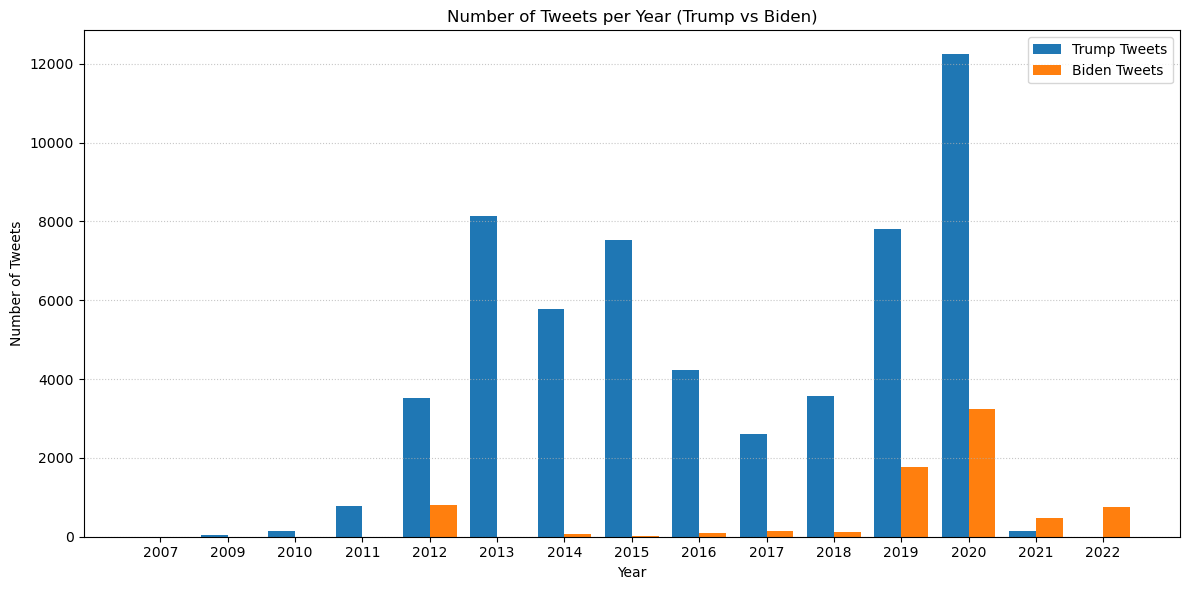

Plot saved to /Users/keremsmacbook/Desktop/42/gitHub/Presidential_Tweets_Impacts_SP500/PresidentialTweetsImpectOnS&P500/Outputs/Plots/tweets_per_year_comparison.png


In [11]:
trump_tweets = pd.read_csv('/Users/keremsmacbook/Desktop/42/gitHub/Presidential_Tweets_Impacts_SP500/PresidentialTweetsImpectOnS&P500/Data/Raw/DonaldTrumpTweets.csv')
biden_tweets = pd.read_csv('/Users/keremsmacbook/Desktop/42/gitHub/Presidential_Tweets_Impacts_SP500/PresidentialTweetsImpectOnS&P500/Data/Raw/JoeBidenTweets.csv')

trump_tweets['date'] = pd.to_datetime(trump_tweets['date'], errors='coerce')
biden_tweets['date'] = pd.to_datetime(biden_tweets['date'], errors='coerce')

trump_tweets_per_year = trump_tweets['date'].dt.year.value_counts().sort_index()
biden_tweets_per_year = biden_tweets['date'].dt.year.value_counts().sort_index()

print("Trump Tweets within years")
print(trump_tweets_per_year)

print("Biden Tweets within years")
print(biden_tweets_per_year)

years = sorted(set(trump_tweets_per_year.index).union(biden_tweets_per_year.index))
data = pd.DataFrame({
    'Year': years,
    'Trump Tweets': [trump_tweets_per_year.get(year, 0) for year in years],
    'Biden Tweets': [biden_tweets_per_year.get(year, 0) for year in years]
})

plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(data['Year']))

plt.bar(x, data['Trump Tweets'], width=bar_width, label='Trump Tweets', align='center')
plt.bar([p + bar_width for p in x], data['Biden Tweets'], width=bar_width, label='Biden Tweets', align='center')

plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Year (Trump vs Biden)')
plt.xticks([p + bar_width / 2 for p in x], data['Year'])
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.tight_layout()

output_dir = '/Users/keremsmacbook/Desktop/42/gitHub/Presidential_Tweets_Impacts_SP500/PresidentialTweetsImpectOnS&P500/Outputs/Plots'
os.makedirs(output_dir, exist_ok=True)  
output_path = os.path.join(output_dir, 'tweets_per_year_comparison.png')
plt.savefig(output_path)

plt.show()

print(f"Plot saved to {output_path}")